# An Introduction to Numpy

## Table of Contents
1. [Introduction](#introduction)
2. [Overview](#overview)
3. [Numpy Arrays](#numpy-arrays)

## Introduction <a name="introduction"></a>

The way we control, manipulate, and analyze data is an important process across all scientific disciplines. Exoplanet research is no different. The astronomical community has generally rallied behind **Python** (if you couldn't already tell from our use of Jupyter notebooks!) as the primary language for developing new data structures, computational methods, and robust analytical packages. These are amazing tools, but using them efficiently requries a solid foundation. This lesson gives a brief overview of the important capabilities behind `Numpy`, some interactive activities to visualize data (with some assistance from `PyPlot`), and how they are used in Exoplanet research.

 <div class="alert alert-block alert-warning">

**IMPORTANT**: If you have limited exposure or practice with Python as a language, it is encouraged to get an understanding of basic syntax and proper use of variables. [Here](https://programming-23.mooc.fi/) is a self-paced, free course offered by the University of Helsinki that covers most of the important concepts in the first few modules.

## Overview

`Numpy` is a robust Python package that incorporates many mathematical tools, data structures, and other useful routines that will be invaluable in your future as a researcher. By the end of this lesson we hope you will be able to:
- **Create, manipulate, and analyze `Numpy` arrays**
- **Utilize and employ mathematical functions**
- **Visualize and interpret basic time-series data using Numpy methods**

[Here](https://numpy.org/devdocs/) is the official documentation for `Numpy`!

We can begin by running code to import `Numpy` to start. In Python, it is often conveinient to import modules with the `as` clause, since it allows you to shorten package specific syntax when writing code. It is common practice to shorten `Numpy` to `np`.

In [3]:
import numpy as np

array(1)

Now that we have `Numpy` imported, we can look at arrays!

## Numpy Arrays
### Basic Properites
In many ways, `Numpy` arrays are similar to base Python lists. They both can:
 - Store data
 - Are mutable
 - Be indexed and sliced
 - Can be iterated over using `for` loops

`Numpy` arrays differ from lists in a few important ways:
- Only one data type allowed (e.g. float, int, string)
- Mathematical operations can be applied to the all elements in the array at once, without needing iteration
- Arrays store memory efficiently, and have a fixed size in memory when created

We will experiment with these different properties in the code below.

In [4]:
array_oneD = np.array((0, 1, 1), dtype=float) #1D array of floats
print(array_oneD, type(array_oneD[0]))
array_twoD = np.array((('a','b'),('c','10')), dtype=str) #2D array of strings
print(array_twoD, type(array_twoD[1,1]))
N = 20
array_N = np.zeros((N), dtype=int) #Generate an (N,1) array of zeros as ints 
for num in range(N):
    array_N[num] = str(num) #Replace the zeros with an iterating number
print(array_N, type(array_N[2]))

[0. 1. 1.] <class 'numpy.float64'>
[['a' 'b']
 ['c' '10']] <class 'numpy.str_'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] <class 'numpy.int32'>


We see we have created three different types of arrays, each with a different dimensionality (`1x3`, `2x2`, `1xN`) and a different data type (`float`, `string`, `integer`, respectively). The dimensionality dictates how the matrix is indexed, an important consideration when designing your own code to analyze data. Arrays of identical dimension can perform item-by-item arithmetic operations, as well as array-wide operations:

In [7]:
A = np.array((2, 2))
B = np.array((3, 12))
C = A + B #Add arrays
D = A - B #Subtract
E = A*B #Multiply
F = A/D #Divide
AA = A**2 #Raise to powers
a = np.cos(A) #Other operations 
AA = A*2 + B/4 #Mix and match
AB = A + 2 + B*100
CD = B/(25*A + 62) + A**2 #???

print(A, B, C, D, E, F, AA, AB, CD)

[2 2] [ 3 12] [ 5 14] [ -1 -10] [ 6 24] [-2.  -0.2] [4.75 7.  ] [ 304 1204] [4.02678571 4.10714286]


As long as the two arrays are **the same dimesions**, you can do any operatrions between them. 

In [9]:
A = np.ones(10, dtype=float)*3.2 ##Start with an array of 1's, then multiply the whole thing by 3.2
AA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] ##To accomplish the same task with lists requires the for loop
for index, ones in enumerate(AA):
    AA[index] = AA[index]*3.2

#Since arrays have a fixed size in memory, and lists do it, it is common to append iteratively through a list, then convert to an array once the loop is finished
AA = np.array(AA)

#Check to see if the two methods produce the same output
if A.all() == AA.all():
    print(True)
else:
    print(False)

True


**List comprehension** is also a common way to quickly iterate over a list, and can be applied to arrays. The standard syntax for list comprehension is:

newlist = [*expression* <span style="color:DodgerBlue">for </span> *item* <span style="color:DodgerBlue">in </span> *iterable* <span style="color:DodgerBlue">if </span> *condition* == <span style="color:DodgerBlue">True</span>]

Note that the condition is optional if we want to apply it to all elements. We can generate the same `for` loop as above.

In [12]:
AA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
AA = [x*3.2 for x in AA]
AA = np.array(AA)
if A.all() == AA.all():
    print(True)
else:
    print(False)

True


### Example: Analyzing a 2D Image
Often times data will be stored in multidimensional arrays, but you'll want to isolate a specific axis. For instance, what if you had an image of an exposure from a telescope, and you wanted the median count over specific rows? Let's say we have a 64x48 grid as our image. How could we analyze this?

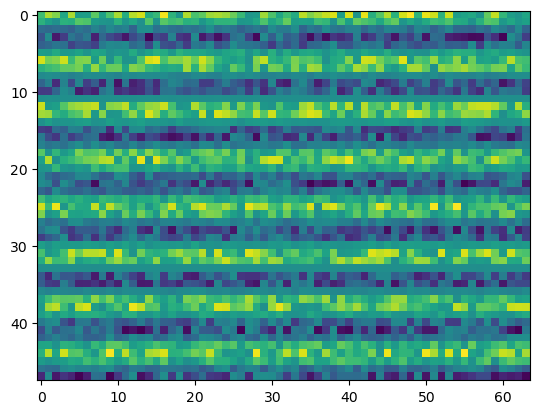

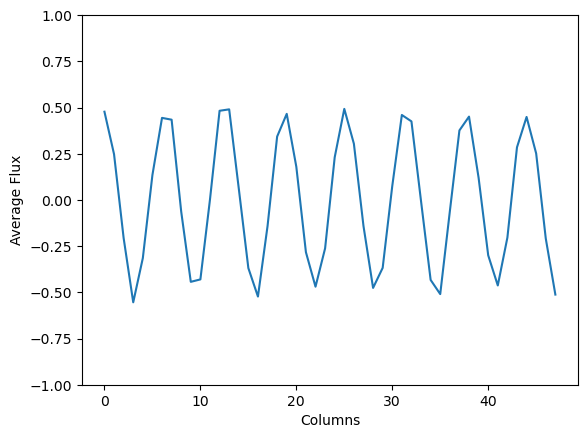

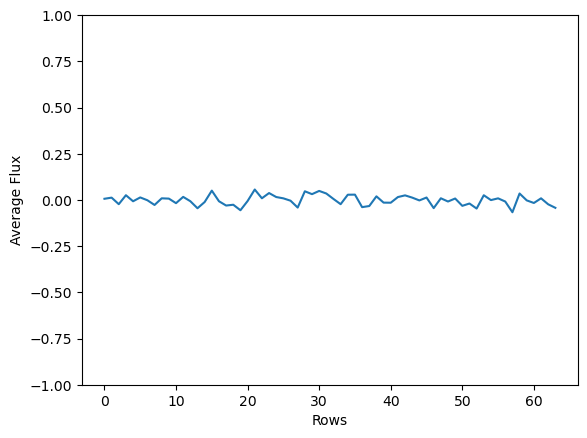

In [26]:
from matplotlib import pyplot as plt

image = np.ones((48, 64), dtype=float)

## Creating the image
for rows, value in enumerate(image):
    for columns, value in enumerate(value):
        image[rows][columns] = image[rows][columns]*np.random.random()*(np.cos(rows))

average_flux_columns = []
average_flux_rows = []
#The first for loop will have a 1D, 64 long array as the variable 'rows,' which we take the average of and append to our list above
for rows in image:
    average_flux_rows.append(np.average(rows))

#Here's a trick: to iterate over columns instead of rows, simply use the 'array.T' method, which transposes your array. That is, rows become columns, and vice versa
#and the dimensionality changes from 48x64 --> 64x48
for columns in image.T:
    average_flux_columns.append(np.average(columns))

##Show our image
plt.imshow(image)
plt.show()
plt.clf()

##Show the average flux of the rows as a function of columns
plt.ylim(-1, 1)
plt.plot(range(0, len(average_flux_rows)), average_flux_rows)
plt.ylabel('Average Flux')
plt.xlabel('Columns')
plt.show()

##Show average flux of the columns as a function of rows
plt.ylim(-1, 1)
plt.ylabel('Average Flux')
plt.xlabel('Rows')
plt.plot(range(0, len(average_flux_columns)), average_flux_columns)

### Handling NANS
Another important property of arrays is the ability to **mask** values that match a certain condition. Of particular concern are masking `NANS` from datasets, which occur frequently, and will break your analysis methods if they are left in. Let's use conditionals to mask out `NANS` in a hypothetical light curve.

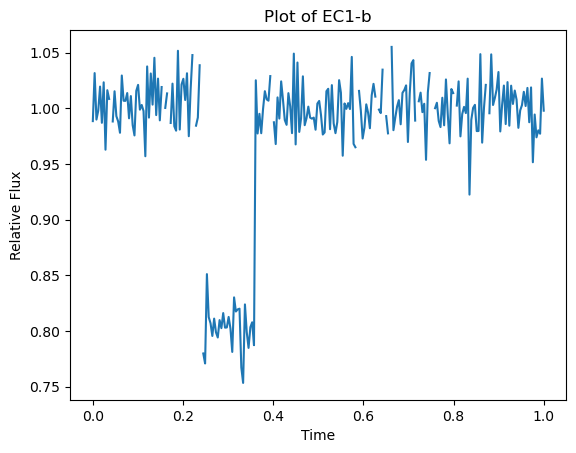

In [22]:
#Generate a time array using linspace
time = np.linspace(0, 1, num = 250)

#Generate fluxes which we start as all 1's
flux = np.ones(250)
for index, data in enumerate(flux):
    #Randomly check if we should make the current value a NAN
    nan_check = np.random.random()

    #Add some Gaussian noise
    flux[index] = flux[index] + np.random.normal(scale=0.02)

    #Add a 'transit'
    if index > 60 and index < 90:
        flux[index] = flux[index] - 0.2
    #The check if the value should be made a nan, which is a 5% chance right now
    if nan_check < 0.05:
        flux[index] = np.nan

##Plot the result
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('Plot of EC1-b')
plt.show()


As we can see, we have simulated a transit for ExoCore1 b, but there are several spots with missing data. If we try to compute the baseline to fit our models, we run into trouble.

In [23]:
#This function checks a value to see if it's a nan or not
def nan_checker(value):
    if np.isnan(value) == True:
        print('No good! NANS!')
    elif np.isnan(value) == False:
        print('All good! No NANS!')

## Compute the baseline after the transit for modeling
baseline = np.average(flux[100:])
nan_checker(baseline)
print(baseline)

No good! NANS!
nan


As we can see, trying to find the median flux for our model returns a `NAN`. To solve this issue, we incorporate the function `np.isfinite()`. What this does is create a Boolean array, using `True` if it is not a `NAN`, and `False` if it is. We can then pass it through our previous array, and the resulting array will remove any present `NAN` elements. 

<div class="alert alert-block alert-info">

**NOTE**: When masking **NANS**, it is important to mask any other relevant arrays associated with those data points, such as time, error, etc. Otherwise, your data will have *dimensionality mismatches*, and if not handled properly, data can be incorrectly assigned or ignored. This can be done by applying the same syntax **other_array[np.isfinite(flux_array_with_nanas)]** to the other arrays in your data. If the other arrays also have **NANS**, this process should be repeated for all relevant arrays.

All good! No NANS!
250 235


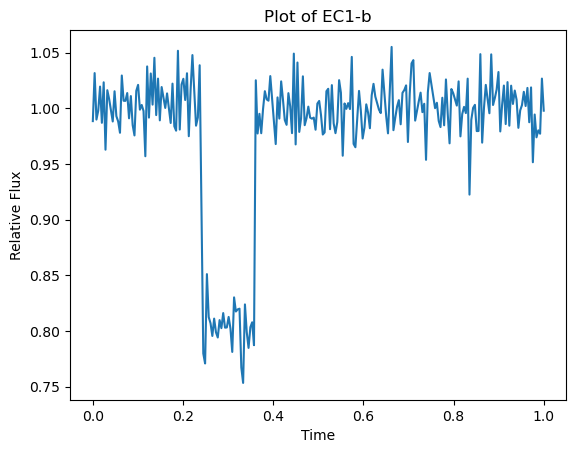

In [28]:
## Masking the data associated with NANS found in the flux array to both the NANS in the flux array, and the elements corresponding to those NANS in the time array
new_time = time[np.isfinite(flux)]
new_flux = flux[np.isfinite(flux)]

## Check to see if we succeeded
baseline = np.average(new_flux[100:])
nan_checker(baseline)

##Show the dimensionality differences between new and old array
print(len(flux), len(new_flux))


##Plot the result
plt.plot(new_time, new_flux)
plt.xlabel('Time')
plt.ylabel('Relative Flux')
plt.title('Plot of EC1-b')
plt.show()